# Basic Logistic Regression for Classifying APS Failures

In [0]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
import seaborn as sns
sns.set()

# Raw Dataset Dtypes Conversion (before clean)

**1.  change 'na' to '-1'**<br>
**2.  drop index column**

In [0]:
train_df = pd.read_csv('train.csv')
train_df = train_df.replace('na', '-1')
train_df = train_df.drop('index', axis = 1)
train_df = train_df.iloc[:, 1:]

train_df.head(3)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,-1,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,-1,0,-1,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,...,-1,-1,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,-1,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0


**one hot encode class**

In [0]:
#train_df['class'] = train_df['class'].map({'neg': 0, 'pos': 1})
train_df['class'] = np.where(train_df['class'] == 'neg', 0, 1)
train_df.head(3)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,-1,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,-1,0,-1,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,...,-1,-1,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,-1,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0


In [0]:
train_df.head(3)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,-1,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,-1,0,-1,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,...,-1,-1,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,-1,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0


**check dtype**

In [0]:
dtype_df = train_df.dtypes.reset_index().groupby([0]).agg('count')
dtype_df

,index
0,
int64,2
object,169


# Preprocessing columns with most zeros


In [0]:
features_drop = ['ab_000' ,'bm_000', 'bn_000', 'bo_000', 'bq_000', 'br_000', 'bq_000', 'cr_000']
#features_drop = ['ch_000','as_000','cr_000','au_000','dj_000','ag_000','dm_000','dl_000','ef_000','dk_000','dz_000','ak_000','eg_000','da_000','ay_000','ay_009','ea_000','ag_001','df_000','ay_001','ay_002','ay_003','dg_000','az_009','ae_000','af_000','cn_000','ay_004','ar_000','ab_000','cs_009','ag_002','az_008','ai_000','at_000','cy_000','dh_000','cn_001','br_000','bq_000','di_000','bp_000']


In [0]:
def dropZeros(df_data, features ):
    
    features_drops = features 
    return df_data.drop(features_drops, axis = 'columns', inplace=True)
    #return df_data


In [0]:
train_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,-1,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,-1,0,-1,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,...,-1,-1,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,-1,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
4,0,60874,-1,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,2128914,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0


**find columns with object type**

In [0]:
cols = [col for col in train_df.columns.values if train_df[col].dtypes == 'object']
len(cols)

169

**change all 'object' type numerical**

In [0]:
train_df[cols] = train_df[cols].astype('float64')
train_df.head(3)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,-1.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,-1.0,0.000000e+00,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,...,-1.0,-1.0,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,-1.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0


**check dtype again to ensure**

In [0]:
dtype_df = train_df.dtypes.reset_index().groupby([0]).agg('count')
dtype_df

,index
0,
int64,2
float64,169


# Clean Dataset

## It is not necessary to look at the correlation matrix if we are using logistic regression model.

**1.  split into POS and NEG cases (before imputation)**<br>
**2.  we need to imputate data respect to the class**

In [0]:
df_pos = train_df[train_df['class'] == 1].reset_index(drop = True)
df_neg = train_df[train_df['class'] == 0].reset_index(drop = True)
print('Pos observations: ', df_pos.shape)
print('Neg observations: ', df_neg.shape)

Pos observations:  (1000, 171)
Neg observations:  (59000, 171)


In [0]:
print('Nan: {}'.format(np.sum(train_df.isnull().values)))

Nan: 0


**imputate positive case**

In [0]:
for col in df_pos.columns[1:]:
    mid = df_pos[df_pos[col] != -1][col].median()
    df_pos.loc[df_pos[col] == -1, col] = mid
print('Nan: {}'.format(np.sum(df_pos.isnull().values)))

Nan: 0


In [0]:
df_pos.head(5)

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,aj_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,av_000,ax_000,ay_005,ay_006,ay_007,ay_008,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,...,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,ct_000,cu_000,cv_000,cx_000,cz_000,db_000,dc_000,dd_000,de_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,1,153204.0,182.0,648.0,11804.0,684444.0,326536.0,31586.0,0.0,0.0,0.0,2658638.0,0.0,29384.0,46356.0,5566182.0,4426834.0,1571480.0,1120644.0,1368.0,862.0,0.0,0.0,94188.0,960182.0,250.0,16.0,32.0,146.0,126.0,951126.0,91162.0,11512.0,702994.0,186172.0,69282.0,36640.0,20698.0,17720.0,18586.0,...,11606.0,370336.0,119892.0,399936.0,149156.0,2826.0,0.0,1267.0,2837.0,10593592.0,2949112.0,7459.0,0.0,12003037.0,16910.0,218.0,51558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.90,166.0,512878.0,293880.0,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0
1,1,453236.0,2926.0,648.0,323436.0,2999280.0,20657518.0,12530224.0,913700.0,12670.0,0.0,18489312.0,0.0,117902.0,203782.0,32633282.0,28658284.0,5348896.0,3667892.0,24514.0,1858.0,2051868.0,2227058.0,8113476.0,15720072.0,28828.0,33264.0,47402.0,627172.0,26128758.0,10570790.0,804.0,22.0,12630142.0,9040546.0,7110184.0,4970218.0,2616558.0,886208.0,160242.0,...,1441482.0,1867216.0,1513156.0,21289878.0,11184234.0,120904.0,50.0,1267.0,2837.0,10593592.0,2949112.0,7459.0,0.0,12003037.0,18132.0,2442.0,260830.0,169964.0,26740.0,73289586.0,16623244.0,1056682.0,155406.0,93686740.0,28423762.0,7966.0,382610.0,432739640.0,7566.64,7353.0,4079752.0,13176956.0,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0
2,1,72504.0,1594.0,1052.0,1249396.0,3813464.0,4876588.0,1202196.0,80186.0,5892.0,1154.0,17783922.0,0.0,602704.0,1043431.0,33124476.0,28430622.0,11195058.0,4631158.0,6488.0,1414.0,0.0,605072.0,8238656.0,2563618.0,8592.0,7120.0,15282.0,23666.0,1102276.0,10250396.0,14.0,0.0,7118800.0,2398182.0,787330.0,396066.0,243178.0,157416.0,110850.0,...,2769170.0,2753324.0,3317804.0,2547452.0,11770.0,0.0,0.0,2210.0,3508.0,5359592.0,113530.0,6.0,0.0,5805990.0,14806.0,4982.0,355244.0,42400.0,7362.0,0.0,0.0,339296.0,53004.0,88760.0,10772.0,0.0,0.0,1550150.0,2365.36,2720.0,5935440.0,2161030.0,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0
3,1,762958.0,865.0,648.0,8123016.0,18022646.0,17301098.0,6753568.0,649400.0,33662.0,0.0,14649948.0,0.0,5043850.0,7995294.0,30556606.0,30750228.0,11311258.0,4023056.0,3346.0,684.0,0.0,99114.0,8113476.0,7154002.0,48266.0,33522.0,49668.0,109452.0,5868650.0,16688128.0,1282.0,4.0,13248978.0,22775258.0,9051478.0,3522892.0,1865404.0,1339114.0,808046.0,...,3005974.0,2626958.0,22675436.0,24722062.0,269506.0,2.0,0.0,2568.0,9484.0,11671410.0,3283150.0,2846.0,0.0,12020128.0,24942.0,1288.0,382508.0,116176.0,26724.0,0.0,0.0,732490.0,122468.0,7376900.0,1158006.0,0.0,0.0,37627810.0,7566.64,7353.0,6009488.0,5033236.0,2949986.0,1295384.0,2591636.0,2717748.0,2185156.0,911552.0,64248.0,8.0
4,1,695994.0,865.0,648.0,55620.0,1190014.0,2406704.0,2654968.0,190640.0,6104.0,0.0,30746644.0,402.0,248428.0,488246.0,64433246.0,53994294.0,20596998.0,10304200.0,3346.0,684.0,131930.0,181448.0,2539358.0,356910.0,7328.0,4408.0,7264.0,121698.0,5067472.0,1281252.0,14628.0,0.0,3262426.0,1210306.0,559028.0,414950.0,388106.0,362616.0,232360.0,...,809876.0,482260.0,2464090.0,2637700.0,76932.0,10.0,0.0,1267.0,2837.0,10593592.0,2949112.0,7459.0,0.0,12003037.0,24942.0,1288.0,355244.0,116176.0,26724.0,0.0,0.0,732490.0,122468.0,7376900.0,1158006.0,0.0,0.0,37627810.0,0.10,0.0,1073478.0,3141688.0,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0


**imputate negative case**

In [0]:
for col in df_neg.columns[1:]:
    mid = df_neg[df_neg[col] != -1][col].median()
    df_neg.loc[df_neg[col] == -1, col] = mid
print('Nan: {}'.format(np.sum(df_neg.isnull().values)))

Nan: 0


In [0]:
df_neg.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058.0,0.0,0.000000e+00,124.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,...,0.0,1710902.0,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874.0,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


**Group Above into A Function >:D**

In [0]:
def clean_data(file_csv, impute = True):
    
    df = pd.read_csv(file_csv) # load csv
    df = df.replace('na', '-1') # replace 'na' to '-1'
    df = df.drop('index', axis = 1) # drop useless columns
    
    df['class'] = df['class'].map({'neg': 0, 'pos': 1}) # one hot encoding
    
    # change all object to numerical
    cols = [col for col in df.columns.values if df[col].dtypes == 'object']
    df[cols] = df[cols].astype('float64')
    # split to positive, negative
    df_pos = df[df['class'] == 1].reset_index(drop = True)
    df_neg = df[df['class'] == 0].reset_index(drop = True)
    # impute by median
    if impute:
        for col in df_pos.columns[1:]:
            mid = df_pos[df_pos[col] != -1][col].median()
            df_pos.loc[df_pos[col] == -1, col] = mid
        for col in df_neg.columns[1:]:
            mid = df_neg[df_neg[col] != -1][col].median()
            df_neg.loc[df_neg[col] == -1, col] = mid
        # check number of NAs in dataframe
        print('Nan: {}'.format(np.sum(df_pos.isnull().values)))
        print('Nan: {}'.format(np.sum(df_neg.isnull().values)))
    return df_pos.append(df_neg, ignore_index = True)

**Data is Cleaned Below !!!**

In [0]:
df_train = clean_data('train.csv')
df_test = clean_data('test.csv')

Nan: 0
Nan: 0
Nan: 0
Nan: 0


In [0]:
features_drop = ['ab_000' ,'bm_000', 'bn_000', 'bo_000', 'bq_000', 'br_000', 'bq_000', 'cr_000']
#features_drop = ['ch_000','as_000','cr_000','au_000','dj_000','ag_000','dm_000','dl_000','ef_000','dk_000','dz_000','ak_000','eg_000','da_000','ay_000','ay_009','ea_000','ag_001','df_000','ay_001','ay_002','ay_003','dg_000','az_009','ae_000','af_000','cn_000','ay_004','ar_000','ab_000','cs_009','ag_002','az_008','ai_000','at_000','cy_000','dh_000','cn_001','br_000','bq_000','di_000','bp_000']
df_train.drop(features_drop, axis = 'columns', inplace=True)

## Feature Selection


In [0]:
# USING THE FUCNTION TO CLEAN DATA. nAME IS DIFFERENT FROM ABOVE 
df_train = df_train.iloc[:, 1:]
df_test = df_test.iloc[:,1:]

In [0]:

#df_train = dropZeros(df_train, features_drop)
#df_test = dropZeros( df_test, features_drop)

In [0]:
df_train.head(2)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1.0,153204.0,0.0,182.0,648.0,0.0,0.0,0.0,0.0,0.0,11804.0,684444.0,326536.0,31586.0,0.0,0.0,0.0,2658638.0,14346.0,0.0,0.0,29384.0,46356.0,5566182.0,4426834.0,1571480.0,1120644.0,2.0,0.0,0.0,0.0,1368.0,862.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,12003037.0,16910.0,218.0,0.0,0.0,55760.0,1433920.0,0.0,0.0,0.0,0.0,51558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.90,166.0,512878.0,293880.0,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,1.0,453236.0,0.0,2926.0,648.0,0.0,0.0,0.0,0.0,222.0,323436.0,2999280.0,20657518.0,12530224.0,913700.0,12670.0,0.0,18489312.0,19038.0,0.0,0.0,117902.0,203782.0,32633282.0,28658284.0,5348896.0,3667892.0,0.0,0.0,0.0,0.0,24514.0,1858.0,2273870.0,2608460.0,1424956.0,1607946.0,1409344.0,2051868.0,2227058.0,...,0.0,12003037.0,18132.0,2442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260830.0,169964.0,26740.0,73289586.0,16623244.0,1056682.0,155406.0,93686740.0,28423762.0,7966.0,382610.0,0.0,0.0,432739640.0,7566.64,7353.0,4079752.0,13176956.0,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0


In [0]:
df_test.head(2)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1.0,1800546.0,0.0,808.0,13042.0,0.0,0.0,0.0,280.0,132164.0,7875494.0,55386332.0,92749198.0,52130878.0,16496844.0,1901366.0,28480.0,82073576.0,196142.0,0.0,0.0,986196.0,1957344.0,149868570.0,115528598.0,84129814.0,34558772.0,0.0,0.0,0.0,0.0,3252.0,614.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,72195158.0,25782.0,1388.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1948124.0,150386.0,31766.0,0.0,0.0,817787.0,142458.0,15447110.0,2213499.0,0.0,0.0,0.0,0.0,52424010.0,51833.90,40332.0,95928594.0,50515302.0,30997662.0,7611880.0,9706814.0,7087194.0,24679144.0,121822.0,52624.0,0.0,0.0,0.0
1,1.0,715316.0,0.0,808.0,730.0,0.0,0.0,0.0,0.0,0.0,0.0,81318.0,5510544.0,20428832.0,4250614.0,17578.0,0.0,6850130.0,69078.0,92.0,0.0,308.0,646.0,14658390.0,11575474.0,7849632.0,2456312.0,0.0,0.0,13972.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520220.0,16030084.0,...,0.0,12970101.0,56488.0,1620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206472.0,563262.0,138524.0,0.0,0.0,1707222.0,213276.0,60959720.0,22363100.0,0.0,0.0,0.0,0.0,52424010.0,0.36,0.0,3703656.0,5965794.0,3905674.0,1753622.0,3247762.0,2700712.0,2902338.0,2787064.0,3187202.0,135060.0,0.0,0.0


In [0]:
def corr_FeatSelect(corr_df, df_data, threshold = 0.9):
  
  N = corr_df.shape[0]

  results =[True for i in range(N)]

  for i in range(N):
    for j in range(i+1, N):
      if corr_df.iloc[i][j] >= threshold:
        if results[j]:
          results[j] = False

  selectedcolumns = df_data.columns[results]
  
  return selectedcolumns



In [0]:
corr = df_train.corr()


In [0]:
selectedcolumns = corr_FeatSelect(corr, df_train)



In [0]:
type(selectedcolumns)

pandas.core.indexes.base.Index

In [0]:
np.savetxt('selectedcolumns_corr.csv', selectedcolumns, delimiter=',', fmt="%s") 

In [0]:
df_train= df_train[selectedcolumns]
df_test = df_test[selectedcolumns]

In [0]:
df_test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ai_000,aj_000,ak_000,al_000,ap_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,...,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,do_000,dq_000,dr_000,ds_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1.0,1800546.0,0.0,808.0,13042.0,0.0,0.0,0.0,280.0,132164.0,7875494.0,55386332.0,92749198.0,52130878.0,16496844.0,1901366.0,28480.0,196142.0,0.0,0.0,986196.0,84129814.0,0.0,0.0,0.0,0.0,3252.0,614.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28112774.0,198588262.0,0.0,119430.0,77174.0,...,196192.0,28.0,0.0,22792.0,8338.0,67080280.0,7558360.0,0.0,68520.0,0.0,0.0,25782.0,1388.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150386.0,0.0,0.0,817787.0,15447110.0,2213499.0,0.0,0.0,0.0,0.0,52424010.0,51833.90,7087194.0,24679144.0,121822.0,52624.0,0.0,0.0,0.0
1,1.0,715316.0,0.0,808.0,730.0,0.0,0.0,0.0,0.0,0.0,0.0,81318.0,5510544.0,20428832.0,4250614.0,17578.0,0.0,69078.0,92.0,0.0,308.0,7849632.0,0.0,0.0,13972.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520220.0,16030084.0,8527642.0,5210936.0,0.0,20496.0,19108.0,...,32718.0,2.0,0.0,1831.0,4148.0,11542932.0,2256630.0,0.0,9009.0,0.0,0.0,56488.0,1620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,563262.0,0.0,0.0,1707222.0,60959720.0,22363100.0,0.0,0.0,0.0,0.0,52424010.0,0.36,2700712.0,2902338.0,2787064.0,3187202.0,135060.0,0.0,0.0
2,1.0,1055714.0,0.0,808.0,730.0,0.0,0.0,0.0,0.0,0.0,130.0,196186.0,10992134.0,41971684.0,13090340.0,141034.0,468.0,24374.0,56.0,0.0,570.0,14718716.0,0.0,0.0,624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,566136.0,29340102.0,32671856.0,3813882.0,0.0,82972.0,111650.0,...,5620.0,0.0,0.0,1831.0,4148.0,11542932.0,2256630.0,0.0,9009.0,0.0,0.0,102.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1860.0,0.0,0.0,6398.0,476860.0,133450.0,0.0,0.0,0.0,0.0,52424010.0,18371.36,8521170.0,6513690.0,3988408.0,6064958.0,307808.0,0.0,0.0
3,1.0,27304.0,2.0,512.0,486.0,0.0,0.0,0.0,0.0,0.0,576480.0,1880082.0,263386.0,26422.0,320.0,0.0,0.0,0.0,222.0,0.0,98112.0,903962.0,0.0,0.0,0.0,0.0,3542.0,1370.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995556.0,751134.0,0.0,1294.0,1732.0,...,0.0,0.0,0.0,490.0,2374.0,1987592.0,278652.0,0.0,34.0,0.0,0.0,6390.0,3202.0,919660.0,608692.0,0.0,0.0,0.0,0.0,0.0,0.0,14428.0,4519524.0,635628.0,91582.0,9225120.0,928912.0,1844974.0,4034.0,0.0,0.0,4274980.0,814.64,203724.0,226244.0,170430.0,7472.0,0.0,0.0,0.0
4,1.0,1520540.0,0.0,808.0,730.0,0.0,0.0,0.0,0.0,0.0,60.0,383930.0,13556044.0,62966486.0,19296738.0,230176.0,2084.0,361312.0,0.0,0.0,1524.0,25353220.0,0.0,0.0,14542.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315174.0,38158622.0,56705340.0,1256382.0,0.0,131164.0,134214.0,...,8904.0,6.0,0.0,1831.0,4148.0,11542932.0,2256630.0,0.0,9009.0,0.0,0.0,72078.0,1388.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150386.0,0.0,0.0,817787.0,15447110.0,2213499.0,0.0,0.0,0.0,0.0,52424010.0,33025.84,12907126.0,7005504.0,3584098.0,4639484.0,113974.0,0.0,0.0


In [0]:
def plot_corr(df_frame, titles_):
  
  f, ax = plt.subplots(figsize=(15, 12))
  corr = df_frame.corr()
  plt.title(titles_)
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot = False, ax=ax)

In [0]:
def plot_corr_2(df):
    f, ax = plt.subplots(figsize=(10, 8))
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df.corr(), mask=mask, cmap=sns.light_palette("navy"), linewidths=.75 )

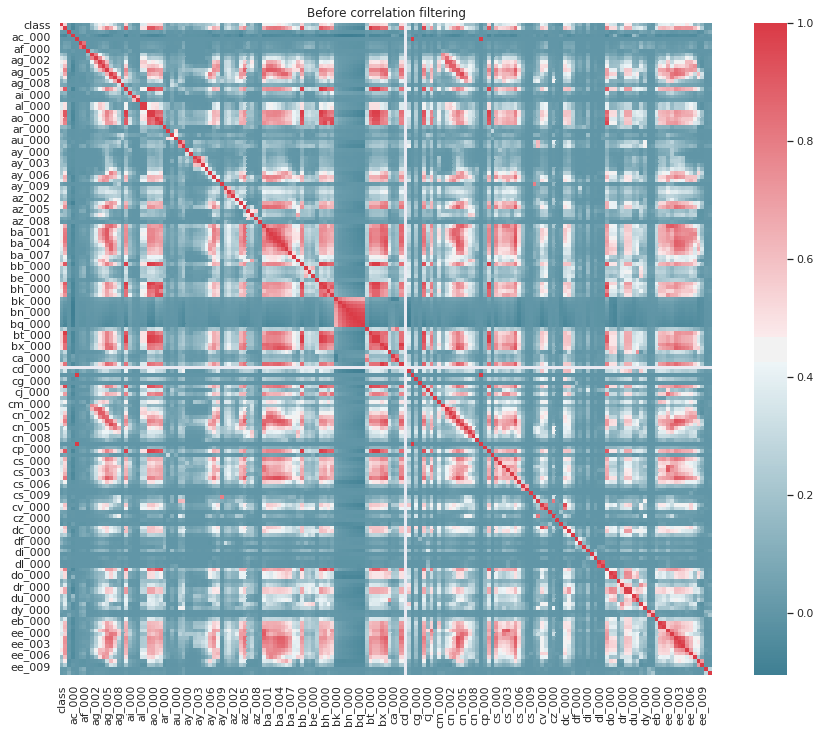

In [0]:
title_ =  "Before correlation filtering" 
plot_corr(df_train, title_)

In [0]:
def plot_corr_dependent(df, dep_name, titles):
  df_corr = corr
  ax=df_corr[[dep_name]].plot(kind='bar')
  plt.xlabel('Attribute')
  plt.ylabel('Correlation')
  plt.title(titles)
  plt.tight_layout()
  plt.show()

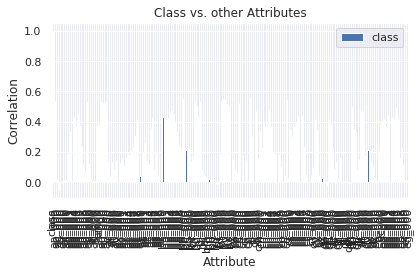

In [0]:
plot_corr_dependent(df_train, 'class', 'Class vs. other Attributes')

In [0]:
corrs = df_train.corr()

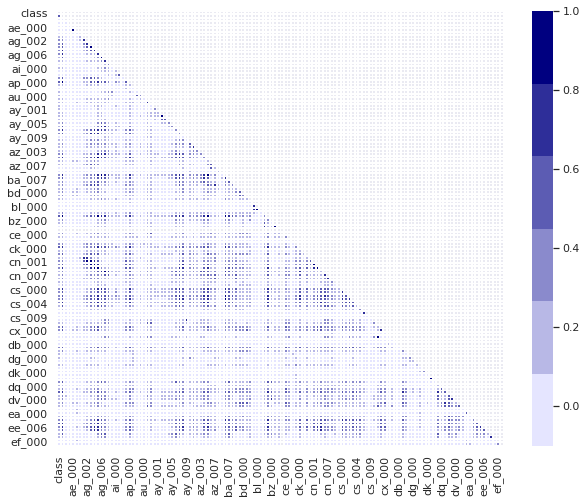

In [0]:
plot_corr_2(df_train)

In [0]:


#features_drop = ['ab_000' ,'bm_000', 'bn_000', 'bo_000', 'bq_000', 'br_000', 'bq_000', 'cr_000']
#features_drop = ['ch_000','as_000','cr_000','au_000','dj_000','ag_000','dm_000','dl_000','ef_000','dk_000','dz_000','ak_000','eg_000','da_000','ay_000','ay_009','ea_000','ag_001','df_000','ay_001','ay_002','ay_003','dg_000','az_009','ae_000','af_000','cn_000','ay_004','ar_000','ab_000','cs_009','ag_002','az_008','ai_000','at_000','cy_000','dh_000','cn_001','br_000','bq_000','di_000','bp_000'
#df_train.drop(features_drop, axis = 'columns', inplace=True)

# Data Preprocessing

**Normalization Classes**

In [0]:
class Standardization():
    
    def __init__(self, X):
        self.std = np.std(X, 0)
        self.mean = np.mean(X, 0)
    
    def fit(self, X, eposilon = 1e-4):
        X_ = X.copy()
        X_ = (X_ - self.mean)/(self.std + eposilon)
        return X_

class MeanNormalization():
    
    def __init__(self, X):
        self.max = np.max(X, 0)
        self.min = np.min(X, 0)
        self.mean = np.mean(X, 0)
    
    def fit(self, X, eposilon = 1e-4):
        X_ = X.copy()
        X_ = (X_ - self.mean)/(self.max - self.min + eposilon)
        return X_

class MaxMinNormalization():
    
    def __init__(self, X):
        self.max = np.max(X, 0)
        self.min = np.min(X, 0)
    
    def fit(self, X, eposilon = 1e-4):
        X_ = X.copy()
        X_ = (X_ - self.min)/(self.max - self.min + eposilon)
        return X_

**normalize data**

In [0]:
trn_data = df_train.to_numpy()
val_data = df_test.to_numpy()

In [0]:
X1, trn_y = trn_data[:,1:], trn_data[:,0]
X2, val_y = val_data[:,1:], val_data[:,0]

In [0]:
norm_obj = MaxMinNormalization(X1)


In [0]:
trn_X = norm_obj.fit(X1)
val_X = norm_obj.fit(X2)

In [0]:
print(np.max(trn_X), np.min(trn_X))
print(np.max(val_X), np.min(val_X))

0.9999999999999883 0.0
15.637601016556047 -1.0732280567436961e-08


# Basic Logistic Regression

**CUSTOMIZED Logistic Regression**

In [0]:
class LogisticRegression():
    
    def __init__(self, size):
        self.w = np.random.randn(size)
        self.b = np.random.randn(1)
    
    def fit(self, X_trn, y_trn, X_val, y_val,\
            lr = 1e-1, epochs = 1e3, show_curve = False):
        epochs = int(epochs)
        N, D = X_trn.shape
        # train and validation loss
        J_trn = np.zeros(epochs)
        J_val = np.zeros(epochs)
        # train
        for epoch in range(epochs):
            # CHECK
            p_hat = self.__forward(X_trn)
            # CHECK
            J_trn[epoch] = weighted_cross_entropy(y_trn, p_hat)
            J_val[epoch] = weighted_cross_entropy(y_val,\
                                                  self.__forward(X_val))
            # weights update
            self.w -= lr*(0.5*(1/len(y_trn[y_trn == 1]))*X_trn[y_trn == 1].T@(p_hat[y_trn == 1] - y_trn[y_trn == 1])+\
                          (1/len(y_trn[y_trn == 0]))*X_trn[y_trn == 0].T@(p_hat[y_trn == 0] - y_trn[y_trn == 0]))
            
            self.b -= lr*(0.5*(1/len(y_trn[y_trn == 1]))*np.sum(p_hat[y_trn == 1] - y_trn[y_trn == 1])+\
                          (1/len(y_trn[y_trn == 0]))*np.sum(p_hat[y_trn == 0] - y_trn[y_trn == 0]))
            
            # self.w -= lr*(1/N)*X_trn.T@(p_hat - y_trn)
            # self.b -= lr*(1/N)*np.sum(p_hat - y_trn)
            # print progress
            if epoch % 500 == 0:
                print('Epoch: {}, train error: {:.4f}, validation error: {:.4f}'.format(epoch,\
                                                                                        J_trn[epoch], J_val[epoch]))
        # plot curve
        if show_curve:
            plt.figure(figsize = (15, 6))
            # train plot
            plt.subplot(121); plt.plot(J_trn)
            plt.xlabel('epochs'); plt.ylabel('$\mathcal{J}$')
            plt.title('Training Curve', fontsize = 15)
            # validation plot
            plt.subplot(122); plt.plot(J_val)
            plt.xlabel('epochs'); plt.ylabel('$\mathcal{J}$')
            plt.title('Validation Curve', fontsize = 15)
            

        return {'J_trn': J_trn, 'J_val': J_val}
    
    
    def __forward(self, X):
        return sigmoid(X@self.w + self.b)
        
    def predict(self, X, thresh = 0.5):
        return (self.__forward(X) >= thresh).astype(np.int32)

**Assistant Functions**

In [0]:
def sigmoid(h, epsilon = 1e-5):
    return 1/(1 + np.exp(-h + epsilon))

def cross_entropy(y, p_hat, epsilon = 1e-3):
    return -(1/len(y)) * np.sum(y * np.log(p_hat + epsilon)\
                                + (1- y) * np.log(1 - p_hat + epsilon))

def weighted_cross_entropy(y, p_hat, epsilon = 1e-3):
    pos_w = 1/len(y[y == 1])
    neg_w = 1/len(y[y == 0])
    pos = -pos_w*np.sum(y[y == 1] * np.log(p_hat[y == 1] + epsilon)\
                        +(1- y[y == 1]) * np.log(1 - p_hat[y == 1] + epsilon))
    neg = -neg_w*np.sum(y[y == 0] * np.log(p_hat[y == 0] + epsilon)\
                        +(1- y[y == 0]) * np.log(1 - p_hat[y == 0] + epsilon))
    return pos + neg
                               
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

def cost(X, y, model, thresh):
    # cost weights
    fp = 10
    fn = 500
    # predict
    y_hat_n = model.predict(X[y == 0], thresh = thresh)
    y_hat_p = model.predict(X[y == 1], thresh = thresh)
    # get cost
    cost1 = fp*np.sum(y_hat_n == 1)
    cost2 = fn*np.sum(y_hat_p == 0)
    return cost1 + cost2

**Performance Function**

In [0]:
def best_threshold(X, y, logistic_model, step = 50):
    cost_values = []
    T = np.linspace(0, 1, step)
    for t in T:
        cost_values.append(cost(X, y, logistic_model, thresh = t))
    return T[np.argmin(cost_values)], np.min(cost_values)

In [0]:
def confusion_matrix(X, y, logistic_model, thresh):
    y_hat_n = logistic_model.predict(X[y == 0], thresh = thresh)
    y_hat_p = logistic_model.predict(X[y == 1], thresh = thresh)
    # fill cm
    cm = {'Actual Pos': [np.sum(y_hat_p == 1), np.sum(y_hat_p == 0)],\
          'Actual Neg': [np.sum(y_hat_n == 1), np.sum(y_hat_n == 0)]}
    cm = pd.DataFrame(data = cm)
    cm = cm.rename(index = {0: 'Pred Pos', 1: 'Pred Neg'})
    return cm

# SMOTE

In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
oversample = SMOTE()
trn_X, trn_y = oversample.fit_resample(trn_X, trn_y)

# Train (if you have the model, jumpy to 'Load Model', SKIP this section)

**buid model**

In [0]:
model = LogisticRegression(trn_X.shape[1])
trn_loss = np.zeros(1)
val_loss = np.zeros(1)

In [0]:
start = time.time()
history = model.fit(trn_X, trn_y, val_X, val_y, lr = 1e-2, epochs = 5000, show_curve = False)
trn_loss = np.hstack((trn_loss, history['J_trn']))
val_loss = np.hstack((val_loss, history['J_val']))
print('training time: {:.0f} mins'.format((time.time() - start)/60))

Epoch: 0, train error: 0.6565, validation error: 0.6154
Epoch: 500, train error: 0.6373, validation error: 0.5957
Epoch: 1000, train error: 0.6206, validation error: 0.5785
Epoch: 1500, train error: 0.6059, validation error: 0.5635
Epoch: 2000, train error: 0.5930, validation error: 0.5502
Epoch: 2500, train error: 0.5814, validation error: 0.5384
Epoch: 3000, train error: 0.5710, validation error: 0.5278
Epoch: 3500, train error: 0.5616, validation error: 0.5181
Epoch: 4000, train error: 0.5530, validation error: 0.5094
Epoch: 4500, train error: 0.5451, validation error: 0.5014
Epoch: 5000, train error: 0.5379, validation error: 0.4940
Epoch: 5500, train error: 0.5312, validation error: 0.4873
Epoch: 6000, train error: 0.5251, validation error: 0.4810
Epoch: 6500, train error: 0.5193, validation error: 0.4752
Epoch: 7000, train error: 0.5140, validation error: 0.4697
Epoch: 7500, train error: 0.5090, validation error: 0.4647
Epoch: 8000, train error: 0.5043, validation error: 0.4599
E

In [0]:
#results_coef = np.zeros(170, 10)
#results_coef[0:169]  = model.b
#dfObj = pd.DataFrame()
#dfObj['1'] =  model.w  

#dfObj['2'] =  model.w  
from sklearn.model_selection import KFold
df_trn_X = pd.DataFrame(trn_X)
kf = KFold(n_splits = 5, shuffle = True, random_state = 2)

ifold = 0

temp_df = pd.DataFrame(list())
temp_df.to_csv('k_fold.csv.csv')
f = open('k_fold.csv', 'w')

dfObj = pd.DataFrame()

df_trn_X = pd.DataFrame(trn_X)


# Cross Validation

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

#kfold = KFold(10, True, 1)
#for train, test in kfold.split(trn_X, trn_y)
#accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

#accuracies.mean()

#accuracies.std()

kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2)

ifold = 0

temp_df = pd.DataFrame(list())
temp_df.to_csv('k_fold.csv.csv')
f = open('k_fold.csv', 'w')

dfObj = pd.DataFrame()
df_cost = pd.DataFrame()
df_recall_prec = pd.DataFrame()
df_trn_X = pd.DataFrame(trn_X)
df_trn_y = pd.DataFrame(trn_y)

for train_index, test_index in kf.split(df_trn_X, df_trn_y):
    X_tr_va, X_test =  trn_X[train_index],  trn_X[test_index]
    y_tr_va, y_test = trn_y[train_index], trn_y[test_index]
    ifold = ifold +1
    model = LogisticRegression(X_tr_va.shape[1])
    trn_loss = np.zeros(1)
    val_loss = np.zeros(1)
    column_name = str(ifold)
    
    start = time.time()
    history = model.fit(trn_X, trn_y, val_X, val_y, lr = 1e-2, epochs = 5000, show_curve = False)
    dfObj[column_name] = model.w
    steps = 50
    t1, score1 = best_threshold(trn_X, trn_y, logistic_model = model, step = step)
    best_t = t1
    score_test= cost(val_X, val_y, model, best_t)
    #t2, score2 = best_threshold(val_X, val_y, logistic_model = model, step = step)
    #best_t = (t1 + t2)/2
    #cost_trn = cost(trn_X, trn_y, model, best_t)
    #cost_val = cost(val_X, val_y, model, best_t)
    df_cost[column_name] = [t1, score1, score_test]

    # get recall and precision for the method
    y_hat_n = model.predict(trn_X[trn_y == 0], thresh = best_t)
    y_hat_p = model.predict(trn_X[trn_y == 1], thresh = best_t)
    
    trn_recall = np.sum(y_hat_p ==1)/(np.sum(y_hat_p ==1) + np.sum(y_hat_n ==0))
    trn_precision = np.sum(y_hat_p ==1)/(np.sum(y_hat_p ==1)+ np.sum(y_hat_n ==1))
    
    y_hat_n_test = model.predict(val_X[val_y == 0], thresh = best_t)
    y_hat_p_test = model.predict(val_X[val_y == 1], thresh = best_t)
    
    test_recall = np.sum(y_hat_p_test ==1)/(np.sum(y_hat_p_test ==1) + np.sum(y_hat_n_test ==0))
    test_precision = np.sum(y_hat_p_test ==1)/(np.sum(y_hat_p_test ==1)+ np.sum(y_hat_n_test ==1))
    
    df_recall_prec[column_name] = [trn_recall, trn_precision, test_recall, test_precision]

    
    # cm = {'Actual Pos': [np.sum(y_hat_p == 1), np.sum(y_hat_p == 0)],\
    #      'Actual Neg': [np.sum(y_hat_n == 1), np.sum(y_hat_n == 0)]}
    trn_loss = np.hstack((trn_loss, history['J_trn']))
    val_loss = np.hstack((val_loss, history['J_val']))
    print('training time: {:.0f} mins'.format((time.time() - start)/60), file = f)
     
    print('Trn Dataset final cost: {}'.format(cost_trn), file = f)
    print('Val Dataset final cost: {}'.format(cost_val), file = f)
    
    f.write('hi there\n')  # python will convert \n to os.linesep
    
    
    #f.close()
f.close()
    #X_train, X_val, y_train, y_val = train_test_split(X_tr_va, y_tr_va, test_size=0.25, random_state=1)
    #print("TRAIN:", list(X_train.index), "VALIDATION:", list(X_val.index), "TEST:", test_index)

Epoch: 0, train error: 1.7148, validation error: 1.7133
Epoch: 500, train error: 1.2811, validation error: 1.2602
Epoch: 1000, train error: 1.1095, validation error: 1.0783
Epoch: 1500, train error: 0.9752, validation error: 0.9378
Epoch: 2000, train error: 0.8797, validation error: 0.8386
Epoch: 2500, train error: 0.8102, validation error: 0.7667
Epoch: 3000, train error: 0.7576, validation error: 0.7127
Epoch: 3500, train error: 0.7165, validation error: 0.6708
Epoch: 4000, train error: 0.6836, validation error: 0.6374
Epoch: 4500, train error: 0.6566, validation error: 0.6101
Epoch: 0, train error: 1.9322, validation error: 1.8948
Epoch: 500, train error: 1.3917, validation error: 1.3536
Epoch: 1000, train error: 1.1821, validation error: 1.1363
Epoch: 1500, train error: 1.0459, validation error: 0.9969
Epoch: 2000, train error: 0.9484, validation error: 0.8994
Epoch: 2500, train error: 0.8756, validation error: 0.8266
Epoch: 3000, train error: 0.8195, validation error: 0.7702
Epoch

In [0]:
dfObj.to_csv("Kfold_coef2.csv")
df_cost.to_csv("Cost_KFold.csv")
df_recall_prec.to_csv("recall_prec_KFold.csv")

In [0]:
temp_recall_prec = df_recall_prec.to_numpy()
temp_recall_prec.transpose()


array([[0.01634371, 0.24277156, 0.02322368, 0.31211317],
       [0.01572389, 0.18882466, 0.022817  , 0.25036711],
       [0.01470536, 0.20014451, 0.02162377, 0.27144047],
       [0.01489666, 0.20937733, 0.02117102, 0.27826087],
       [0.01589996, 0.18522373, 0.02237958, 0.25263952],
       [0.01702564, 0.21759783, 0.02391391, 0.2788536 ],
       [0.01709999, 0.18866061, 0.0242412 , 0.24810997],
       [0.01661879, 0.22761284, 0.02372613, 0.29620462],
       [0.0152967 , 0.22509702, 0.02139847, 0.29898804],
       [0.01699538, 0.17065651, 0.02429944, 0.22880816]])

NameError: ignored

In [0]:
columnsNames2 = ['trn_recall', 'trn_precision', 'test_recall', 'test_precision']
df_recallprec_pic = pd.DataFrame(columns= columnsNames2, data = temp_recall_prec)

In [0]:
temp_cost = df_cost.to_numpy()
temp_cost = temp_cost.transpose()


In [0]:
temp_cost
columnNames = ["threshold_Value", "TrainCost", "TestCost"]
df_cost_pic = pd.DataFrame(columns= columnNames, data = temp_cost)

In [0]:
df_cost_pic

,threshold_Value,TrainCost,TestCost
0,0.326531,69650.0,19490.0
1,0.367347,90270.0,29480.0
2,0.346939,70330.0,21060.0
3,0.306122,76460.0,21250.0
4,0.346939,80430.0,24000.0
5,0.306122,60710.0,14970.0
6,0.326531,74040.0,25910.0
7,0.346939,73860.0,17690.0
8,0.285714,59580.0,15260.0
9,0.306122,87250.0,24390.0


Text(0, 0.5, 'Cost of Service')

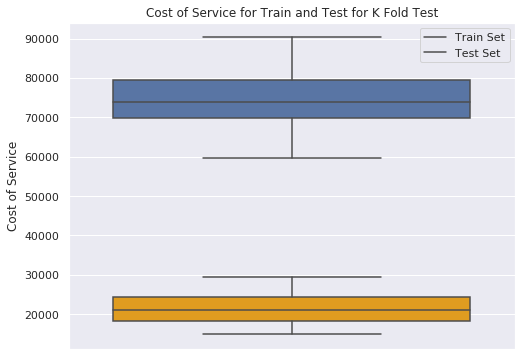

In [0]:
#data = pd.concat([data_stores['Type'], data_stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
#fig = sns.boxplot(y="TrainCost", x='threshold_Value', , data=df_cost_pic)
plt.title("Cost of Service for Train and Test for K Fold Test")
#plt.legend("Train set")
sns.boxplot(y = 'TestCost', data = df_cost_pic, color = "Orange")
plt.legend(["Train Set", "Test Set"])
sns.boxplot(y = 'TrainCost', data = df_cost_pic)
plt.ylabel("Cost of Service")


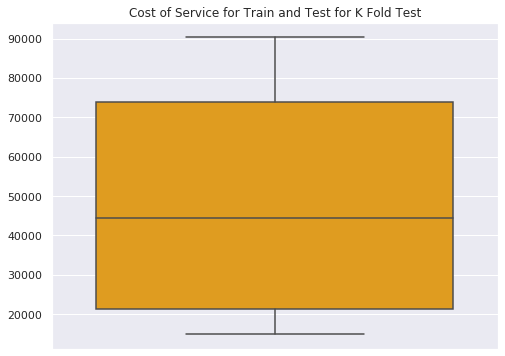

In [0]:
f, ax = plt.subplots(figsize=(8, 6))
plt.title("Cost of Service for Train and Test for K Fold Test")
sns.boxplot(y = ['TestCost', 'TrainCost'], data = df_cost_pic, color = "Orange" )


#fig = sns.boxplot(y="TrainCost", x='threshold_Value', , data=df_cost_pic)
#plt.title("Cost of Service for Train and Test for K Fold Test")
#sns.boxplot(y = 'TestCost', data = df_cost_pic, color = "Orange", label)

#sns.boxplot(y = 'TrainCost', data = df_cost_pic)
#plt.ylabel("Cost of Service")


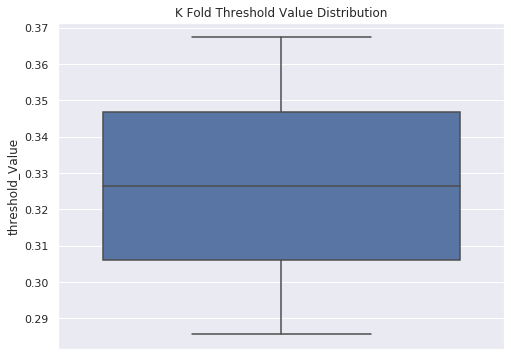

In [0]:
f, ax = plt.subplots(figsize=(8, 6))
plt.ylabel("Threshold Value")
plt.title("K Fold Threshold Value Distribution")
sns.boxplot(y = 'threshold_Value', data = df_cost_pic)



**plot losses**

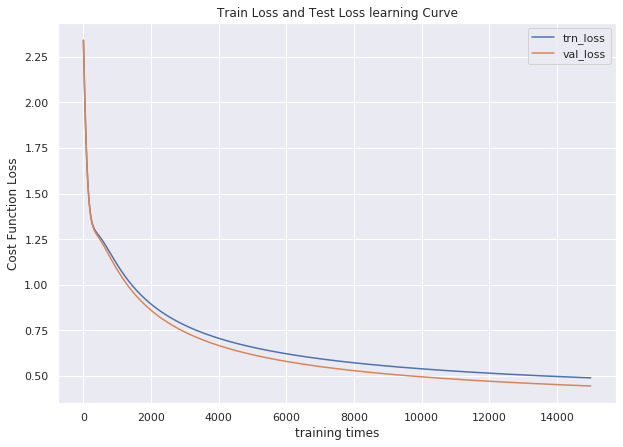

In [0]:
plt.figure(figsize = (10, 7))
plt.plot(trn_loss[1:])
plt.plot(val_loss[1:])
plt.title("Train Loss and Test Loss learning Curve")
plt.xlabel("training times")
plt.ylabel("Cost Function Loss")
plt.legend(['trn_loss', 'val_loss'])

**find the best threshold**

In [0]:
step = 50
t1, score1 = best_threshold(trn_X, trn_y, logistic_model = model, step = step)
t2, score2 = best_threshold(val_X, val_y, logistic_model = model, step = step)
print('Trn Dataset cost: {}, thresh: {:.4f}'.format(score1, t1))
print('Val Dataset cost: {}, thresh: {:.4f}'.format(score2, t2))
best_t = (t1 + t2)/2
print('Final Threshold: {}'.format(best_t))

Trn Dataset cost: 64990, thresh: 0.3265
Val Dataset cost: 17810, thresh: 0.3061
Final Threshold: 0.31632653061224486


**result**

In [0]:
cost_trn = cost(trn_X, trn_y, model, best_t)
cost_val = cost(val_X, val_y, model, best_t)
print('Trn Dataset final cost: {}'.format(cost_trn))
print('Val Dataset final cost: {}'.format(cost_val))

Trn Dataset final cost: 66920
Val Dataset final cost: 18500


##############################################################################
############################### **End** ##########################################

# Danger Zone: Load Model

In [0]:
file_name = 'model_basic_logreg_score_12610.npy'
params = np.load(file_name)
model = LogisticRegression(val_X.shape[1])
model.w, model.b = params[:-1], params[-1]
# loss array
trn_loss = np.zeros(1)
val_loss = np.zeros(1)

**retrain model**

In [0]:
start = time.time()
history = model.fit(trn_X, trn_y, val_X, val_y, lr = 1e-2, epochs = 10000, show_curve = False)
trn_loss = np.hstack((trn_loss, history['J_trn']))
val_loss = np.hstack((val_loss, history['J_val']))
print('training time: {:.0f} mins'.format((time.time() - start)/60))

In [0]:
plt.plot(trn_loss[1:])
plt.plot(val_loss[1:])
plt.legend(['trn_loss', 'val_loss'])

**find the best threshold**

In [0]:
step = 50
t1, score1 = best_threshold(trn_X, trn_y, logistic_model = model, step = step)
t2, score2 = best_threshold(val_X, val_y, logistic_model = model, step = step)
print('Trn Dataset cost: {}, thresh: {:.4f}'.format(score1, t1))
print('Val Dataset cost: {}, thresh: {:.4f}'.format(score2, t2))
best_t = t1*(1/4) + t2*(3/4)
print('Final Threshold: {}'.format(best_t))

C:\Users\shuxg\AppData\Local\Continuum\anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Trn Dataset cost: 54940, thresh: 0.2857
Val Dataset cost: 21220, thresh: 0.2449
Final Threshold: 0.2551020408163265


**result**

In [0]:
cost_trn = cost(trn_X, trn_y, model, best_t)
cost_val = cost(val_X, val_y, model, best_t)
print('Trn Dataset final cost: {}'.format(cost_trn))
print('Val Dataset final cost: {}'.format(cost_val))

Trn Dataset final cost: 68970
Val Dataset final cost: 18160


**train confusion matrix**

In [0]:
confusion_matrix(trn_X, trn_y, logistic_model = model, thresh = best_t)

,Actual Pos,Actual Neg
Pred Pos,915,2647
Pred Neg,85,56353


**validation confusion matrix**

In [0]:
confusion_matrix(val_X, val_y, logistic_model = model, thresh = best_t)

,Actual Pos,Actual Neg
Pred Pos,353,750
Pred Neg,22,14875


# Danger Zone: Save Parameters

**save model**

In [0]:
file_name = 'model_basic_logreg_score_' + str(cost_val)
params = np.hstack((model.w, model.b))
print(file_name)

model_basic_logreg_score_12610


In [0]:
np.save(file_name, params)

**save threshold**

In [0]:
file_name = 'threh_basic_logreg_score_' + str(cost_val)
np.save(file_name, best_t)

In [0]:
np.load('threh_basic_logreg_score_' + str(cost_val) + '.npy')

array(0.25510204)

**save other params**<br>
1. deleted columns
2. normalization parameters

In [0]:
param_df = pd.DataFrame({'Mins': norm_obj.min, 'Maxs': norm_obj.max})

In [0]:
file_name = 'param_basic_logreg_score_' + str(cost_val) + '.csv'
param_df.to_csv(file_name, index = False)

In [0]:
pd.read_csv(file_name)

,Mins,Maxs
0,0.0,2.746564e+06
1,0.0,2.040000e+02
2,0.0,2.130707e+09
3,0.0,8.584298e+09
4,0.0,2.105000e+04
...,...,...
165,0.0,1.195801e+08
166,0.0,1.926740e+07
167,0.0,3.810078e+06
168,0.0,4.820000e+02
